# Accessing AWS Satellite Data

As simplified as possible. Last updated 2024 May 15.

**Libraries needed:**

In [1]:
#---Cloud search libraries
import s3fs
import requests

#---Accessory libraries
import datetime
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt

**Connecting to AWS remote storage:**

In [2]:
fs = s3fs.S3FileSystem(anon=True)

**Listing out the products available for satellite:**

In [3]:
products = fs.ls('noaa-goes16')
for product in products:
   print(product.split('/')[-1])


ABI-L1b-RadC
ABI-L1b-RadF
ABI-L1b-RadM
ABI-L2-ACHA2KMC
ABI-L2-ACHA2KMF
ABI-L2-ACHA2KMM
ABI-L2-ACHAC
ABI-L2-ACHAF
ABI-L2-ACHAM
ABI-L2-ACHP2KMC
ABI-L2-ACHP2KMF
ABI-L2-ACHP2KMM
ABI-L2-ACHTF
ABI-L2-ACHTM
ABI-L2-ACMC
ABI-L2-ACMF
ABI-L2-ACMM
ABI-L2-ACTPC
ABI-L2-ACTPF
ABI-L2-ACTPM
ABI-L2-ADPC
ABI-L2-ADPF
ABI-L2-ADPM
ABI-L2-AICEF
ABI-L2-AITAF
ABI-L2-AODC
ABI-L2-AODF
ABI-L2-BRFC
ABI-L2-BRFF
ABI-L2-BRFM
ABI-L2-CCLC
ABI-L2-CCLF
ABI-L2-CCLM
ABI-L2-CMIPC
ABI-L2-CMIPF
ABI-L2-CMIPM
ABI-L2-COD2KMF
ABI-L2-CODC
ABI-L2-CODF
ABI-L2-CPSC
ABI-L2-CPSF
ABI-L2-CPSM
ABI-L2-CTPC
ABI-L2-CTPF
ABI-L2-DMWC
ABI-L2-DMWF
ABI-L2-DMWM
ABI-L2-DMWVC
ABI-L2-DMWVF
ABI-L2-DMWVM
ABI-L2-DSIC
ABI-L2-DSIF
ABI-L2-DSIM
ABI-L2-DSRC
ABI-L2-DSRF
ABI-L2-DSRM
ABI-L2-FDCC
ABI-L2-FDCF
ABI-L2-FDCM
ABI-L2-FSCC
ABI-L2-FSCF
ABI-L2-FSCM
ABI-L2-LSAC
ABI-L2-LSAF
ABI-L2-LSAM
ABI-L2-LST2KMF
ABI-L2-LSTC
ABI-L2-LSTF
ABI-L2-LSTM
ABI-L2-LVMPC
ABI-L2-LVMPF
ABI-L2-LVMPM
ABI-L2-LVTPC
ABI-L2-LVTPF
ABI-L2-LVTPM
ABI-L2-MCMIPC
ABI-L2-MCMIPF
ABI-L2-MCMIPM
ABI

**Listing out the files for a data product:**

In [4]:
year = 2023
month = 10
day = 1
hour = 19

julian_day = datetime.datetime(year, month, day).strftime('%j')
print(julian_day)

274


In [5]:
bucket = 'noaa-goes16'
product = 'ABI-L1b-RadF' #---Full disk ABI radiance

data_path = bucket + '/' + product + '/'  + str(year) + '/' + julian_day + '/' + str(hour).zfill(2)

files = fs.ls(data_path)

for file in files:
   print(file.split('/')[-1])

OR_ABI-L1b-RadF-M6C01_G16_s20232741900203_e20232741909511_c20232741909540.nc
OR_ABI-L1b-RadF-M6C01_G16_s20232741910203_e20232741919511_c20232741919540.nc
OR_ABI-L1b-RadF-M6C01_G16_s20232741920203_e20232741929511_c20232741929550.nc
OR_ABI-L1b-RadF-M6C01_G16_s20232741930203_e20232741939511_c20232741939543.nc
OR_ABI-L1b-RadF-M6C01_G16_s20232741940203_e20232741949511_c20232741949549.nc
OR_ABI-L1b-RadF-M6C01_G16_s20232741950203_e20232741959511_c20232741959554.nc
OR_ABI-L1b-RadF-M6C02_G16_s20232741900203_e20232741909511_c20232741909546.nc
OR_ABI-L1b-RadF-M6C02_G16_s20232741910203_e20232741919511_c20232741919551.nc
OR_ABI-L1b-RadF-M6C02_G16_s20232741920203_e20232741929511_c20232741929541.nc
OR_ABI-L1b-RadF-M6C02_G16_s20232741930203_e20232741939511_c20232741939551.nc
OR_ABI-L1b-RadF-M6C02_G16_s20232741940203_e20232741949511_c20232741949534.nc
OR_ABI-L1b-RadF-M6C02_G16_s20232741950203_e20232741959511_c20232741959543.nc
OR_ABI-L1b-RadF-M6C03_G16_s20232741900203_e20232741909511_c20232741909550.nc

**Selecting a file:**

In [6]:
file = files[0] #---first is the top-of-the-hour
print(file)

noaa-goes16/ABI-L1b-RadF/2023/274/19/OR_ABI-L1b-RadF-M6C01_G16_s20232741900203_e20232741909511_c20232741909540.nc


**Accessing the file from AWS:**

In [7]:
resp = requests.get(f'https://'+bucket+'.s3.amazonaws.com/'+file[12:])
if str(resp) != '<Response [200]>':
    print('b07 file not found in AWS servers')

In [8]:
nc = netCDF4.Dataset(file, memory = resp.content)
ds = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))

In [9]:
ds

<xarray.Dataset>
Dimensions:                                           (y: 10848, x: 10848,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       band: 1,
                                                       number_of_harmonization_coefficients: 3,
                                                       num_star_looks: 24)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float64 0.1519 ... ...
  * x                                                 (x) float64 -0.1519 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_id                                           (band) int8 ...
    band_wavelength                                   (band) float32 ...
    t_star_look                                       (num_star_looks) datetime64[ns] ...
    band_wavelength_star_look                         (num_star_looks) float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band, number_of_harmonization_coefficients,
                                num_star_looks
Data variables: (12/39)
    Rad                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    algorithm_dynamic_input_data_container            int32 ...
    processing_parm_version_container                 int32 ...
    algorithm_product_version_container               int32 ...
    star_id                                           (num_star_looks) float32 ...
    channel_integration_time                          float64 ...
    channel_gain_field                                float64 ...
Attributes: (12/30)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    production_site:           RBU
    ...                        ...
    timeline_id:               ABI Mode 6
    date_created:              2023-10-01T19:09:54.0Z
    time_coverage_start:       2023-10-01T19:00:20.3Z
    time_coverage_end:         2023-10-01T19:09:51.1Z
    LUT_Filenames:             SpaceLookParams(FM1A_ADR1270_PR_12_02_01)-7371...
    id:                        d40e5017-e645-4d1f-b6ee-3bbc80e6c3fd

**Visualizing the image:**

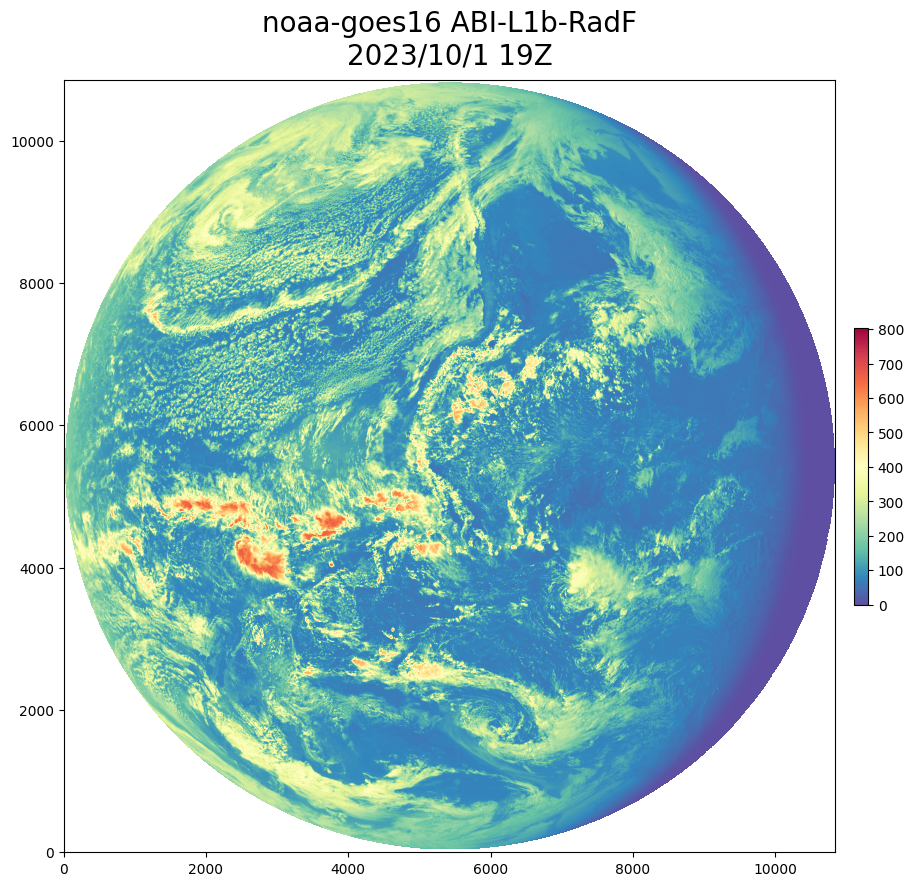

In [10]:
date_formatted = str(year)+'/'+str(month)+'/'+str(day)+' '+str(hour)+'Z'

fig,ax=plt.subplots(1, figsize=(12,12))
cmap = plt.cm.Spectral_r

img=ax.imshow(ds.Rad, cmap='Spectral_r', origin='lower')
clb=plt.colorbar(img, shrink=0.3, pad=0.02, ax=ax)
ax.set_title(bucket + ' ' + product +'\n'+date_formatted, fontsize=20, pad=12)

plt.show()